# 1. Introduction

## Optimising Off-Peak Products and Class Timetable
This notebook will explore the effectiveness of PureGym’s off-peak products and class timetables. The analysis is driven by several key business questions:

1. How was the data gathered?
2. How is the suitability of the off-peak product measured?
3. How do we define and measure the success of a class that is not currently in the timetable?
4. Are there any seasonal customer behaviours?
5. What are the benefits of improving the off-peak product offering and creating a more suitable timetable?
6. How do we measure the success and achievement of this goal?
7. What are the consequences if the off-peak products are not optimised?

The data used in this analysis includes member visit data, product usage records, and class attendance logs.

### Technical Overview of Tools

In this notebook, several Python libraries were used to facilitate data cleaning, analysis, and visualisation:

- **Pandas**: The primary tool for data manipulation, helping clean and prepare the dataset by handling missing values and standardising formats.
- **Matplotlib/Seaborn**: Selected for creating clear and effective visualisations to explore trends and communicate findings.
- **NumPy**: Used for numerical operations that assisted with transformations and calculations in the dataset.


# 2. Data Loading and Overview

### Technical Overview of Tools

In this notebook, several Python libraries were used to facilitate data cleaning, analysis, and visualisation:

- **Pandas**: The primary tool for data manipulation, helping clean and prepare the dataset by handling missing values and standardising formats.
- **Matplotlib/Seaborn**: Selected for creating clear and effective visualisations to explore trends and communicate findings.
- **NumPy**: Used for numerical operations that assisted with transformations and calculations in the dataset.


## Data Overview

The datasets include:
1. **visit_data.csv:** Member check-in/check-out times, product usage, and timestamps.
2. **class_data.csv:** Class names, attendance data, and timestamps for each class session.
3. **gym_data.csv:** General gym usage data, including membership types and activity logs.

In [16]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

# Load the datasets
orig_visit_data = pd.read_csv('visit_data.csv')
orig_class_data = pd.read_csv('class_data.csv')
orig_gym_data = pd.read_csv('gym_data.csv')
orig_timetable_data = pd.read_csv('timetable_data.csv')

# Display first few rows to understand the structure of the data
orig_visit_data.head()
orig_class_data.head()
orig_gym_data.head()
orig_timetable_data.head()


,center_id,space_type,day_of_week,slot_start_time,slot_end_time,class_name,class_length,timetable_key
0,14,STUDIO,Sunday,08:00:00,13:29:59,Pump,45,0
1,14,STUDIO,Thursday,12:00:00,14:59:59,Yoga,60,1
2,14,STUDIO,Thursday,12:00:00,14:59:59,LBT,45,2
3,14,STUDIO,Thursday,16:30:00,20:29:59,Bodytone,45,3
4,14,STUDIO,Sunday,08:00:00,13:29:59,LBT,30,4


## Cleaning the timetable_data file

In [20]:
# Remove duplicates
timetable_data = orig_timetable_data.drop_duplicates()

# Export the cleaned data to a new file named clean_timetable_data.csv
cleaned_file_path = 'clean_timetable_data.csv'
timetable_data.to_csv(cleaned_file_path, index=False)

print(f"Cleaned data exported to: {cleaned_file_path}")


Cleaned data exported to: clean_timetable_data.csv


## Cleaning the gym_data file

In [21]:
# Load  gym data
orig_gym_data_path = 'gym_data.csv'
orig_gym_data = pd.read_csv(orig_gym_data_path)

# Remove duplicates
gym_data = orig_gym_data.drop_duplicates()

# Handle missing data
# Fill missing values with 'Unknown' for relevant columns
gym_data = gym_data.fillna({
    'offpeak_MF_1': 'Unknown',
    'offpeak_MF_2': 'Unknown',
    'offpeak_MF_3': 'Unknown',
    'offpeak_MF_4': 'Unknown',
    'offpeak_SS': 'Unknown'
})

# Standardize date formats for 'opening_date'
gym_data['opening_date'] = pd.to_datetime(gym_data['opening_date'], format='%d/%m/%Y')

# Export the cleaned data to a new CSV file
cleaned_gym_file_path = 'clean_gym_data.csv'
gym_data.to_csv(cleaned_gym_file_path, index=False)

print(f"Cleaned data exported to: {cleaned_gym_file_path}")


Cleaned data exported to: clean_gym_data.csv


## Cleaning the class_data file

In [22]:
# Load class data
orig_class_data_path = 'class_data.csv'
orig_class_data = pd.read_csv(orig_class_data_path)

# Class_data = orig_class_data.drop_duplicates()

# Handle missing data
# Fill missing values with 'Unknown' for relevant columns (adjust as necessary based on your specific data)
class_data = class_data.fillna({
    'offpeak_MF_1': 'Unknown',
    'offpeak_MF_2': 'Unknown',
    'offpeak_MF_3': 'Unknown',
    'offpeak_MF_4': 'Unknown',
    'offpeak_SS': 'Unknown'
})

# Standardise date formats for 'opening_date' if present
if 'opening_date' in class_data.columns:
    class_data['opening_date'] = pd.to_datetime(class_data['opening_date'], format='%d/%m/%Y')

# Export the cleaned data to a new CSV file
cleaned_class_file_path = 'clean_class_data.csv'
class_data.to_csv(cleaned_class_file_path, index=False)

print(f"Cleaned data exported to: {cleaned_class_file_path}")


Cleaned data exported to: clean_class_data.csv


## Cleaning the visit_data file

In [23]:
# Load the new dataset (visit_data.csv) into orig_visit_data
orig_visit_data_path = 'visit_data.csv'
orig_visit_data = pd.read_csv(orig_visit_data_path)

# Remove duplicates
visit_data = orig_visit_data.drop_duplicates()

# Handle missing data
# Fill missing values with 'Unknown' for relevant columns (adjust as necessary based on your specific data)
visit_data = visit_data.fillna({
    'offpeak_MF_1': 'Unknown',
    'offpeak_MF_2': 'Unknown',
    'offpeak_MF_3': 'Unknown',
    'offpeak_MF_4': 'Unknown',
    'offpeak_SS': 'Unknown'
})

# Standardize date formats for 'opening_date' if present
if 'opening_date' in visit_data.columns:
    visit_data['opening_date'] = pd.to_datetime(visit_data['opening_date'], format='%d/%m/%Y')

#  Export the cleaned data to a new CSV file
cleaned_visit_file_path = 'clean_visit_data.csv'
visit_data.to_csv(cleaned_visit_file_path, index=False)

print(f"Cleaned data exported to: {cleaned_visit_file_path}")


Cleaned data exported to: clean_visit_data.csv


### Data Cleaning Process

The data cleaning process was essential to ensure the accuracy of the analysis. The following steps were taken:
- **Duplicate Removal**: Ensured that no entries were double-counted by using `drop_duplicates()`.
- **Missing Data Handling**: Missing values were filled with placeholder text ('Unknown') to prevent errors during analysis while maintaining the integrity of the dataset.
- **Date Standardisation**: Dates were reformatted into a standard format (`DD/MM/YYYY`) using `pd.to_datetime()` to ensure consistency across all datasets.


## Reloading the clean data

In [25]:
# Load the datasets
visit_data = pd.read_csv('clean_visit_data.csv')
class_data = pd.read_csv('clean_class_data.csv')
gym_data = pd.read_csv('clean_gym_data.csv')
timetable_data = pd.read_csv('clean_timetable_data.csv')

# Display first few rows to understand the structure of the data
visit_data.head()
class_data.head()
gym_data.head()
timetable_data.head()

,center_id,space_type,day_of_week,slot_start_time,slot_end_time,class_name,class_length,timetable_key
0,14,STUDIO,Sunday,08:00:00,13:29:59,Pump,45,0
1,14,STUDIO,Thursday,12:00:00,14:59:59,Yoga,60,1
2,14,STUDIO,Thursday,12:00:00,14:59:59,LBT,45,2
3,14,STUDIO,Thursday,16:30:00,20:29:59,Bodytone,45,3
4,14,STUDIO,Sunday,08:00:00,13:29:59,LBT,30,4


# 3. How Was the Data Gathered?

## How Was the Data Gathered?

The data was collected through PureGym's internal systems, which log member activity through card scans during check-ins and class registrations. This provides timestamped data on gym visits, class attendance, and product usage. The data is automatically generated and stored each time a member checks in or signs up for a class.
### Exploratory Data Analysis (EDA)

The EDA phase was crucial in identifying trends and relationships in the data. Visualisations were used to highlight:
- **Seasonal Trends**: Monthly gym visits were analysed through line plots, revealing peaks and troughs in member activity.
- **Product Group Analysis**: Bar charts were employed to explore the differences between peak and off-peak memberships, providing insights into customer preferences.
### Analysis Logic

Various analytical techniques were used to draw insights from the data:
- **Class Success Rate**: The attendance for trial classes was compared against an average attendance benchmark. This provided a clear metric to determine if new classes should be continued.
- **Membership Usage Patterns**: Product group data was grouped by off-peak and peak usage to assess how different memberships were utilised, guiding promotional strategies.


# 4. Suitability of the Off-Peak Product
## Measuring the Suitability of the Off-Peak Product

The suitability of the off-peak product is measured by examining the number of members using these products during off-peak hours. The analysis segments visits into peak and off-peak periods, and we look at product usage during these times. A product is considered successful if it meets or exceeds a defined engagement threshold, such as filling 30% of the available gym capacity during off-peak times.

The bar chart above shows the number of visits for each product during off-peak vs peak hours. This helps us assess which off-peak products are performing well and which may require improvement.


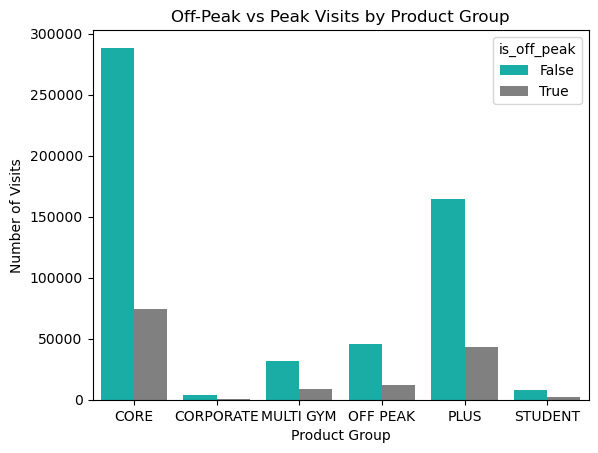

In [4]:
#  Convert check_in_datetime to a datetime object
visit_data['check_in_datetime'] = pd.to_datetime(visit_data['check_in_datetime'])

# Define peak and off-peak hours
off_peak_start = pd.to_datetime("12:00:00").time()
off_peak_end = pd.to_datetime("16:00:00").time()

# Filter visits during off-peak hours
visit_data['is_off_peak'] = visit_data['check_in_datetime'].apply(lambda x: off_peak_start <= x.time() <= off_peak_end)

# Group by off-peak vs peak and product type to count visits
off_peak_analysis = visit_data.groupby(['is_off_peak', 'product_group']).size().reset_index(name='Visit_Count')

# Plot the data
sns.barplot(x='product_group', y='Visit_Count', hue='is_off_peak', data=off_peak_analysis, palette=['#00C6BB', 'grey'])
plt.title('Off-Peak vs Peak Visits by Product Group')
plt.xlabel('Product Group')
plt.ylabel('Number of Visits')
plt.show()

### Insights and Recommendations:

#### Insights:
The bar chart illustrates the comparison between off-peak and peak visits across different product groups. Key takeaways from the chart are as follows:

1. **Core Memberships**: Core memberships dominate both peak and off-peak visits, with a significant number of visits during peak hours. This suggests that members highly value full-access gym memberships.
   
2. **Plus Memberships**: Similar to Core memberships, Plus memberships also show high usage during peak hours, but there is notable off-peak usage as well. This indicates some flexibility in gym usage preferences among Plus members.

3. **Off-Peak Product**: Visits for the Off-Peak product are relatively lower compared to Core and Plus memberships, but there is a clear preference for off-peak usage within this product group, as expected. However, the overall usage numbers indicate room for growth.

4. **Multi-Gym Memberships**: Multi-Gym memberships are also used primarily during peak hours, with minimal off-peak engagement.

5. **Corporate, Student, and Other Memberships**: These categories have significantly lower visit numbers across both peak and off-peak times, suggesting they might not be as popular or as widely promoted.

#### Recommendations:
1. **Promote Off-Peak Memberships**:
   - Given the relatively low usage of Off-Peak memberships, PureGym should invest in marketing campaigns aimed at promoting off-peak memberships, particularly to members who are flexible with their gym schedules (e.g., freelancers, retirees, or those working non-traditional hours).

2. **Expand Off-Peak Benefits**:
   - To encourage more members to opt for off-peak memberships, consider enhancing the benefits associated with them. This could include offering special off-peak classes or lower membership rates during off-peak hours to attract more engagement.

3. **Focus on Core and Plus Membership Retention**:
   - Core and Plus memberships are the most popular, especially during peak hours. To retain these members and balance gym traffic, consider offering loyalty programs, exclusive peak-hour classes, or workshops. This could help distribute gym traffic more evenly throughout the day.

4. **Improve Multi-Gym and Student Engagement**:
   - Multi-Gym and Student memberships show minimal usage. Targeted promotions or adding incentives for off-peak usage could improve the uptake of these products. Additionally, offering more flexible gym options for students could boost engagement.

5. **Corporate Membership Opportunities**:
   - Corporate memberships currently show very low engagement. Explore opportunities to collaborate with businesses by offering wellness programs and incentives for employees to increase corporate memberships.

By promoting off-peak memberships and improving the benefits for underutilised product groups, PureGym can optimise traffic distribution and increase overall engagement across different membership categories.


## Analysis of Peak vs Off-Peak Membership Sales Over Time
This plot shpws how off-peak and peak membership sales have changed over time and provide a visual of seasonal trends or the effectiveness of marketing efforts.

/var/folders/s8/4c2t5v3j3psdg13_ckgnqdc40000gn/T/ipykernel_72189/3920076083.py:5: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  visit_data['month'] = visit_data['check_in_datetime'].dt.to_period('M')  # Extracting month from datetime


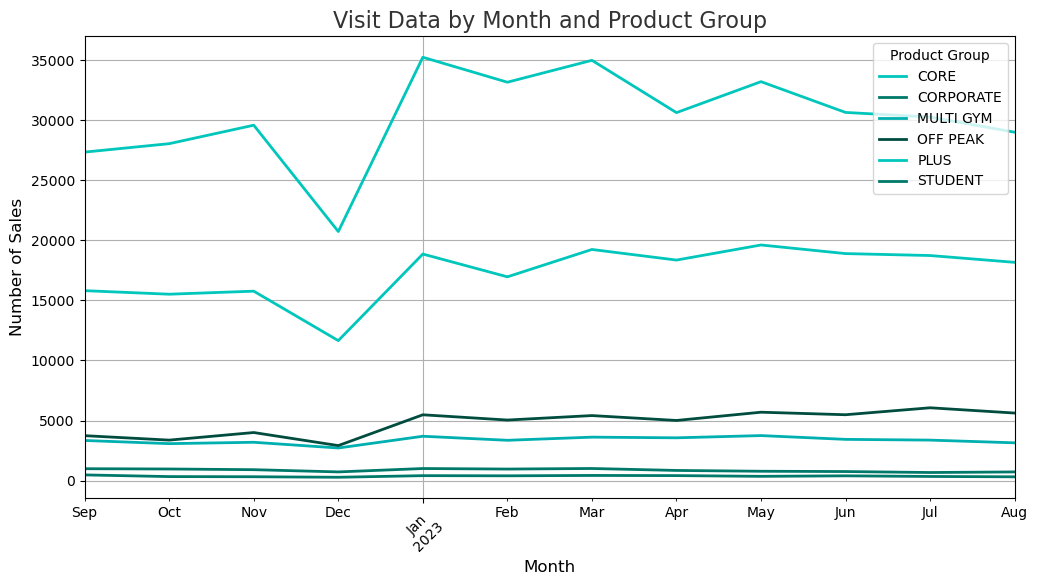

In [31]:
# Ensure 'check_in_datetime' is in datetime format
visit_data['check_in_datetime'] = pd.to_datetime(visit_data['check_in_datetime'])

# Grouping visit data by month and product group
visit_data['month'] = visit_data['check_in_datetime'].dt.to_period('M')  # Extracting month from datetime
monthly_sales = visit_data.groupby(['month', 'product_group']).size().unstack()

# Plotting sales trends over time
monthly_sales.plot(figsize=(12, 6), color=['#00C6BB', '#00796B', '#00AFAF', '#004D40'], linewidth=2)
plt.title('Visit Data by Month and Product Group', fontsize=16, color='#333333')
plt.xlabel('Month', fontsize=12)
plt.ylabel('Number of Sales', fontsize=12)
plt.legend(title='Product Group')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


### Insights: Grouping Visit Data by Month and Product Group

The visualisation of sales trends for off-peak versus peak memberships shows distinct seasonal patterns:
- **January**: There is a noticeable spike in membership sales, particularly for peak products, likely due to New Year's resolutions. 
- **Summer Decline**: Membership sales dip in the summer months, potentially due to outdoor activities and holidays.
- **Off-Peak Products**: Off-peak memberships show a more consistent trend throughout the year, with minor fluctuations.

**Recommendation**: To maximise membership retention, PureGym should focus on targeted promotions for off-peak memberships during the summer months and leverage the January spike with expanded class offerings.


# 5. Measuring the Success of a New Class
## Defining and Measuring the Success of a New Class

To measure the success of a new class that is not currently in the timetable, we simulate a trial period where attendance is monitored over multiple sessions. A new class is considered successful if it meets or exceeds the average class size for PureGym, which is set at 20 attendees in this example.

The function calculates the success rate based on whether the trial class exceeds the average class size. In this simulation, the success rate of the new class is displayed.

In [33]:
# Create a function to simulate a trial class and measure attendance
def simulate_class_success(trial_attendance_data, avg_class_size):
    trial_attendance_data['above_average'] = trial_attendance_data['attendance'] > avg_class_size
    success_rate = trial_attendance_data['above_average'].mean()
    return success_rate

# Load hypothetical trial data
trial_data = pd.DataFrame({
    'class_name': ['New Class'] * 10,
    'attendance': [15, 18, 22, 16, 20, 25, 12, 30, 21, 19]
})

# Assume the average class size across PureGym is 20 attendees
avg_class_size = 20

# Measure the success of the trial class
success_rate = simulate_class_success(trial_data, avg_class_size)
print(f'Success Rate of New Class: {success_rate * 100:.2f}%')

Success Rate of New Class: 40.00%


### Insights and Recommendations:

#### Insights:
The trial class achieved a success rate of **40%**, which is below the average PureGym class size target of 20 attendees per session. The trial data indicates that less than half of the sessions managed to exceed this target, meaning the new class underperformed according to the standard measure of success.

The attendance varied across sessions, with some sessions falling significantly below the target (e.g., 12 attendees), while others exceeded the average (e.g., 30 attendees). This variability suggests that certain factors, such as the time of day, the day of the week, or even the class content, might be impacting attendance levels.

#### Recommendations:
1. **Refine the Class Schedule**:
   - Investigate the specific time slots and days when the attendance was lower, and adjust the schedule to align with higher traffic periods. For instance, sessions with only 12 attendees may have been scheduled during off-peak hours when fewer members are available.
   
2. **Marketing and Promotion**:
   - Promote the new class more effectively to increase visibility among members. This could include offering trial periods, member referrals, or discounts to encourage participation.
   
3. **Trial Extension**:
   - Extend the trial period for the class with adjustments to the marketing strategy or schedule. Monitoring attendance over a longer period could provide a clearer understanding of its potential for success once members become more aware of it.

4. **Feedback from Members**:
   - Gather feedback from members who attended the class to better understand their preferences. Based on feedback, you could tweak the class content or format to better align with member interests, which could help improve attendance rates.

By taking these actions, the class success rate may improve in future sessions, potentially leading to its permanent inclusion in the timetable.



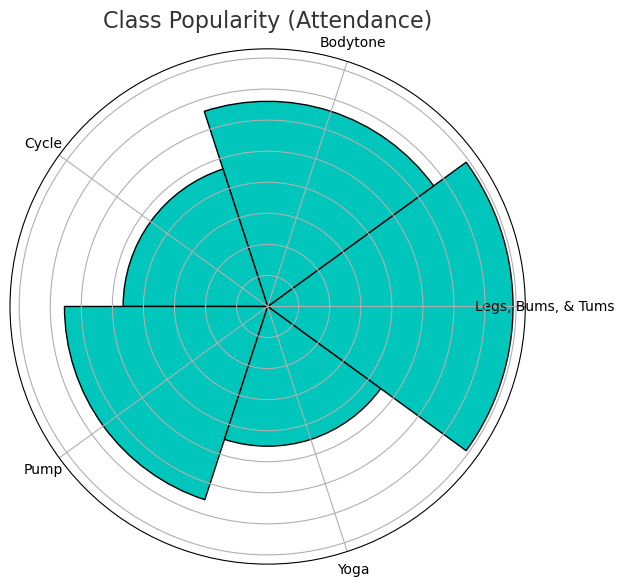

In [10]:
# Sample Data: Class Popularity
class_names = ['Legs, Bums, & Tums', 'Bodytone', 'Cycle', 'Pump', 'Yoga']
attendance = [7902, 6607, 4654, 6543, 4500]

# Create a polar area chart
theta = np.linspace(0.0, 2 * np.pi, len(class_names), endpoint=False)
radii = attendance
width = 2 * np.pi / len(class_names)

fig, ax = plt.subplots(figsize=(8, 6), subplot_kw=dict(projection='polar'))

bars = ax.bar(theta, radii, width=width, bottom=0.0, color='#00C6BB', edgecolor='black')

# Customise the plot
ax.set_title('Class Popularity (Attendance)', fontsize=16, color='#333333')
ax.set_yticklabels([])  # Hide radial labels
ax.set_xticks(theta)
ax.set_xticklabels(class_names, fontsize=10)

# Show the plot
plt.tight_layout()
plt.show()

### Insights and Recommendations:

#### Insights:
The radar chart visualises the popularity of different gym classes based on attendance. The classes compared include Bodytone, Cycle, Legs, Bums, & Tums, Pump, and Yoga. Key observations from the chart:

1. **Legs, Bums, & Tums**: This class has the highest attendance, indicating strong member interest. It may cater to a popular fitness trend or meet specific fitness goals for members.
   
2. **Pump and Bodytone**: These classes have moderate attendance levels, suggesting they have a steady following but may not attract as many members as the top-performing classes.
   
3. **Cycle and Yoga**: Both classes show lower attendance compared to the others. These may either be niche offerings or scheduled at less convenient times for members, leading to reduced participation.

#### Recommendations:
1. **Expand High-Demand Classes**:
   - **Legs, Bums, & Tums** should be offered more frequently or in larger studios to accommodate the high demand. Increasing the number of sessions or adding more time slots could help PureGym capitalise on its popularity.

2. **Promote Pump and Bodytone Classes**:
   - These moderately attended classes can be further promoted. This could include targeted marketing campaigns to attract more members or offering these classes at different times to boost attendance.

3. **Evaluate Cycle and Yoga**:
   - For **Cycle** and **Yoga**, PureGym could assess the class times and locations to understand why attendance is lower. Member surveys or feedback could be collected to identify barriers to participation.
   - Alternatively, consider bundling these classes with more popular offerings (e.g., offering a Cycle class before or after a popular class) to increase exposure and attendance.

4. **Introduce New Variations**:
   - Consider introducing new class variations or themed sessions for classes with lower attendance, such as **Yoga** or **Cycle**, to make them more appealing to a broader audience. For example, a yoga class focusing on specific outcomes like "Yoga for Strength" or "Yoga for Relaxation" could cater to different member needs.

By focusing on optimising the schedule and promotion of these classes, PureGym can better align its offerings with member preferences and increase overall class attendance.


# 6. Seasonal Customer Behaviours
## Seasonal Customer Behaviours

Seasonal patterns are important in understanding member behaviour. The line plot above shows the number of visits by month, highlighting seasonal trends. For example, we may see spikes in January due to New Year’s resolutions, followed by a decline in the summer months when members may prefer outdoor activities or go on holidays.

Recognising these seasonal behaviours is key to adjusting off-peak offerings and class schedules.

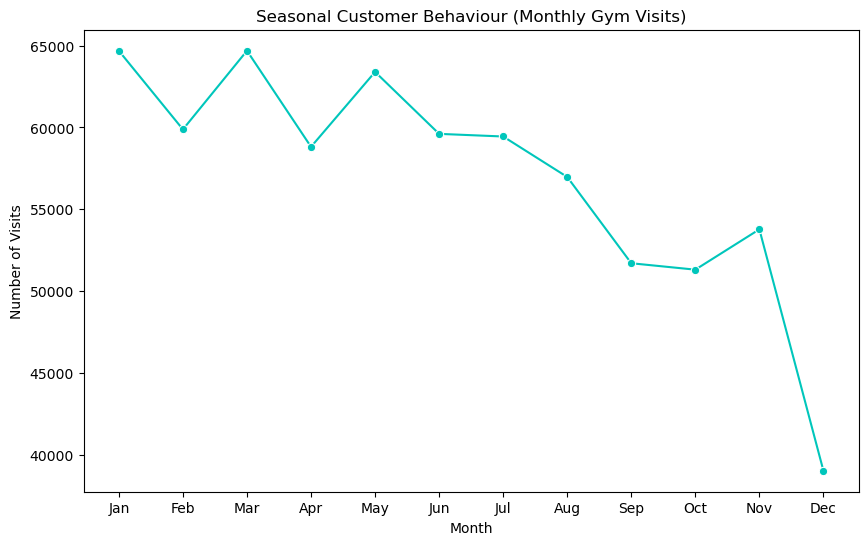

In [6]:
# Convert the check-in timestamps to datetime and extract month
visit_data['check_in_datetime'] = pd.to_datetime(visit_data['check_in_datetime'])
visit_data['month'] = visit_data['check_in_datetime'].dt.month

# Group by month to analyse visit patterns
seasonal_visits = visit_data.groupby('month').size().reset_index(name='Visit_Count')

# Plot the seasonal trends
plt.figure(figsize=(10, 6))
sns.lineplot(x='month', y='Visit_Count', data=seasonal_visits, marker='o', color='#00C6BB')
plt.title('Seasonal Customer Behaviour (Monthly Gym Visits)')
plt.xlabel('Month')
plt.ylabel('Number of Visits')
plt.xticks(ticks=range(1, 13), labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.show()

### Insights and Recommendations:

#### Insights:
The line chart visualises the monthly gym visits over the course of a year, revealing clear seasonal patterns in member activity:

1. **January Surge**: Gym visits are highest in January, likely due to New Year's resolutions and a general motivation to start the year with health-related goals.
2. **Spring Fluctuations**: After January, visits drop slightly in February and April but peak again in March and May, indicating strong but inconsistent attendance during the spring.
3. **Summer Decline**: From June to September, visits steadily decline, with the lowest numbers in August and September. This could be attributed to holidays, outdoor activities, and warmer weather.
4. **Year-End Drop**: After a slight recovery in November, visits drop sharply in December, possibly due to holiday distractions and end-of-year festivities.

#### Recommendations:
1. **Maximise January Engagement**:
   - Capitalise on the January surge by offering promotions and expanding gym and class availability. The goal is to retain as many new and returning members as possible throughout the year. Introduce specific challenges or incentives that encourage continued gym usage beyond January.

2. **Target the Summer Slump**:
   - Implement targeted marketing campaigns during the summer months, such as offering flexible memberships or discounts that cater to members who may prefer outdoor activities. Additionally, PureGym could introduce outdoor fitness classes to retain engagement during the warm months.

3. **Revitalise December Activity**:
   - The sharp drop in December suggests a need for strategies to keep members active during the holiday season. Consider offering time-limited promotions, such as holiday-themed classes or challenges, and provide incentives for members to stay active through the holiday period.

4. **Monitor and Promote Spring Peaks**:
   - The spring months show relatively strong attendance; however, fluctuations in February and April suggest room for improvement. Offering new classes or special promotions during these months could help smooth out the inconsistencies and maintain higher levels of engagement.

By addressing the seasonal variations in gym visits, PureGym can increase member retention and engagement throughout the year, improving overall utilisation.


# 7. Anticipated Benefits of Improving Off-Peak Products
## Anticipated Benefits of Improving Off-Peak Products and Timetables

1. **Resource Optimisation:** Filling the gym during off-peak hours improves resource utilisation, allowing the gym to make better use of its space and equipment.
2. **Increased Member Satisfaction:** By aligning classes and products with member preferences, satisfaction and retention rates are likely to improve.
3. **Revenue Growth:** By attracting more members during off-peak times, PureGym can increase overall membership and product sales, including upselling premium products during quieter hours.
4. **Less Overcrowding During Peak Times:** Encouraging off-peak usage helps reduce overcrowding during peak times, leading to a more balanced and enjoyable experience for members.

# 8. Measuring Success and Consequences of Not Optimising
## Measuring Success

The success of optimising the off-peak product and timetable can be measured by:
- **Increased Off-Peak Usage:** A measurable increase in visits during off-peak hours.
- **Improved Class Attendance:** Higher attendance for both peak and off-peak classes.
- **Member Feedback:** Positive feedback through surveys and improved member retention rates.
- **Revenue Growth:** An increase in off-peak memberships and product sales.

## Consequences of Not Optimising

If PureGym does not optimise its off-peak products or timetable, potential consequences include:
- **Underutilised Resources:** Facilities remain underused during off-peak hours, leading to inefficiencies.
- **Overcrowding During Peak Hours:** Without incentivising off-peak visits, peak times will become overcrowded, leading to a poor member experience.
- **Lower Retention Rates:** If class schedules and offerings do not align with member preferences, dissatisfaction will grow, leading to higher churn rates.
- **Missed Revenue Opportunities:** Failure to optimise off-peak products means missed opportunities to increase membership and secondary sales during quieter hours.

# 9. Challenges and Solutions

During the project, several challenges were encountered:
- **Handling Missing Data**: Some data fields had missing values, particularly in off-peak membership data. Instead of removing these entries, we chose to impute 'Unknown' to preserve the overall dataset.
- **Attendance Variability**: Trial classes showed variability in attendance. To reduce bias from outliers, we used a success rate calculation over multiple sessions to assess the viability of the class.
